# Runge-Kutta 4 (RK4) Algorithm for Numerical Physics

The Runge-Kutta algorithm employs the Taylor series expansion of the function we wish to find about some point. Then, in a separate operation we expand the original function as a power series and compare the two expressions. Going up to the fourth order term in the expansions is what leads to the name 'RK4', as it requires the calculation of 4 coefficients to find the function:

For some $dy/dt=g(y,t)$

$$y(t+T) = y(t) + \frac{1}{6}(c_1 + 2c_2 + 2c_3 + c_4)$$

This notebook contains various examples in physics where the RK4 technique is useful, such as solving the simple harmonic oscillator problem, solving the energies for the externally driven 2-level atom in the rotating wave approximation and solving the quantum Liouville equation for externally driven spin half particle and the spontaneous emission problem.


## Solving the simple harmonic oscillator problem using Runge-Kutta method


This code solves the simple harmonic oscillator problem, consisting of a pair of coupled ODEs, using RK4.

The equations to solve are as follows:

$$ dx/dt = v $$
$$ dv/dt = -4\pi^2 x $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
N=10000 # Number of grid points
t=np.linspace(0,5,N) # Time array
x=np.zeros(N,dtype=complex) # Allocating space for x solution
v=np.zeros(N,dtype=complex) # Allocating space for v solution
x[0]=0 # Initial condition x(t=0)=0
v[0]=1 # Initial condition v(t=0)=1
w=1/6; # Weighting factor used in RK4

# Exact analytical solutions for comparison with numerical solutions
xexact=(1/(2*np.pi))*np.sin(2*np.pi*t)
vexact=np.cos(2*np.pi*t)

In [3]:
# Defining functions to integrate in an array to use in SciPy
# First element of F is dx/dt, second is dv/dt
# F[[dx/dt=v],[dv/dt=-4(pi^2)x]]
def dFdt(t,F):
    k=-4*np.pi**2
    return np.array([F[1], k*F[0]])

# Initial conditions
F0=np.array([0,1]) # x(t=0)=0, v(t=0)=1
t0=0 # t=0

# Setting integrand in scipy integrator and calling RK4 method
r=integrate.complex_ode(dFdt).set_integrator('dopri5') 
r.set_initial_value(F0,t0) # Setting initial values
xv=np.zeros((2,N),dtype=complex) # Allocating space for solutions in 2xN matrix

# Begin coupled SciPy RK4
for i in range(1,t.size):
    xv[:,i]=r.integrate(t[i])
    if not r.successful():
        raise RuntimeError("Could Not Integrate")

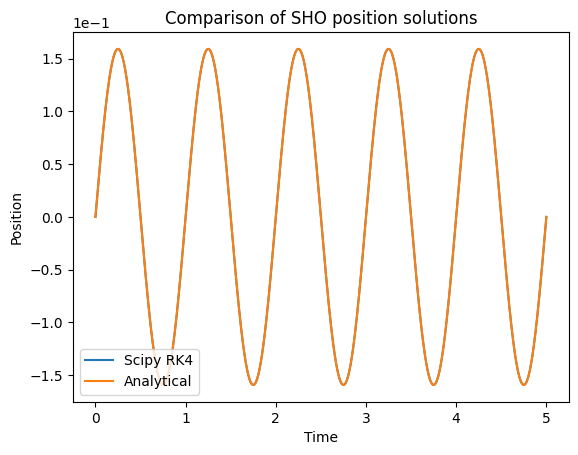

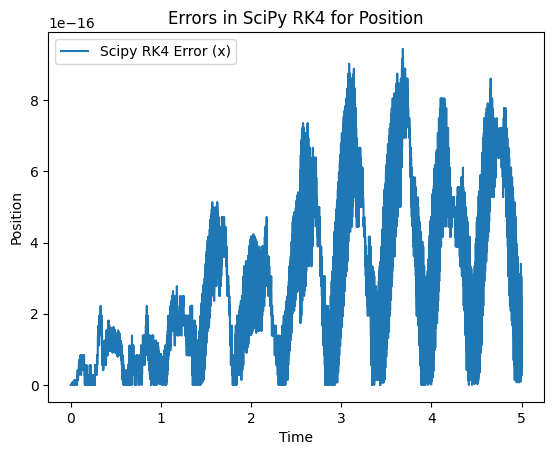

In [4]:
# Plotting solutions for position
plt.plot(t,np.real(xv[0,:]),label='Scipy RK4')
plt.plot(t,xexact,label='Analytical')
plt.title('Comparison of SHO position solutions')
plt.xlabel('Time')
plt.ylabel('Position')
plt.ticklabel_format(axis='both', style='sci', scilimits=(1,3))
plt.legend(loc=3)
plt.show()

# Plotting errors in position
plt.plot(t[1:],abs(xexact[1:]-np.real(xv[0,1:])),label='Scipy RK4 Error (x)')
plt.title('Errors in SciPy RK4 for Position')
plt.xlabel('Time')
plt.ylabel('Position')
plt.ticklabel_format(axis='both', style='sci', scilimits=(1,3))
plt.legend()
plt.show()

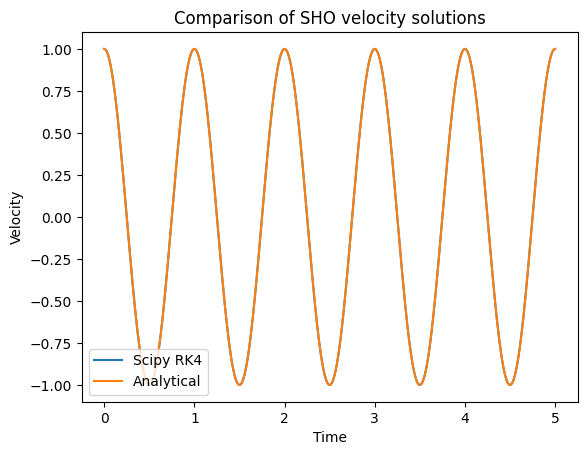

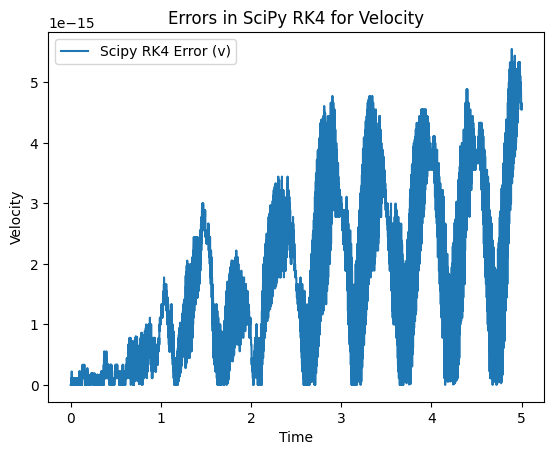

In [5]:
# Plotting solutions for velocity
plt.plot(t[1:],np.real(xv[1,1:]),label='Scipy RK4')
plt.plot(t,vexact,label='Analytical')
plt.title('Comparison of SHO velocity solutions')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.ticklabel_format(axis='both', style='sci', scilimits=(1,3))
plt.legend(loc=3)
plt.show()

# Plotting errors in velocity
plt.plot(t[1:],abs(vexact[1:]-np.real(xv[1,1:])),label='Scipy RK4 Error (v)')
plt.legend()
plt.title('Errors in SciPy RK4 for Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.ticklabel_format(axis='both', style='sci', scilimits=(1,3))
plt.show()

## FInding the energy for a two-level atom driven by an external harmonic field


Solving the Time-Dependent Schrodinger equation (TDSE) in the Rotating Wave Approximation (RWA) for a two-level atom driven by an external harmonic field

$$da/dt = i(WW/2)\exp(idt)b(t)$$

$$db/dt = i(WW/2)\exp(-idt)a(t)$$

RWA is used when the detuning 
is very small, i.e.: the transition frequency $\omega_0$ is close to the driving 
frequency $\omega$. This implies the system is being excited on resonance, or very 
close to resonance, thus we can approximate the solution by killing off fast 
rotating terms. As we deviate from this condition, RWA no longer holds and thus 
the solution becomes more unstable.


In [6]:
N=10000 # Number of grid points
t=np.linspace(0,100,N) # Time array
a=np.zeros(N,dtype=complex) # Allocating space for solution to coefficient a
b=np.zeros(N,dtype=complex) # Allocating space for solution to coefficient b
# Initial conditions
a[0]=1/(np.sqrt(2))
b[0]=-1/(np.sqrt(2))
w=1/6; # Weighting factor used in RK4
WW=2 # Energy in units of hbar
# Detuning (w-w0)
# d=-0.5
# d=-0.05
d=0.05
# d=0.5

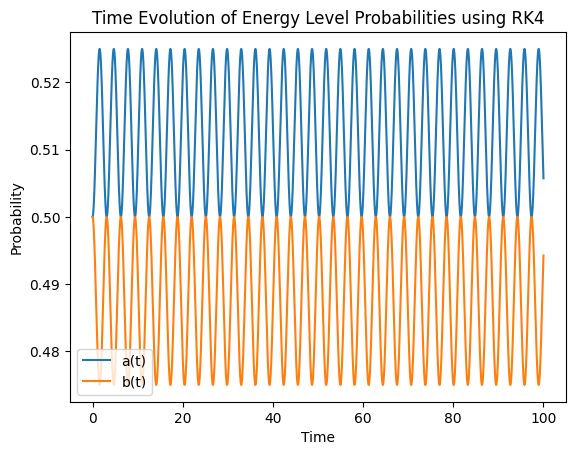

In [7]:
# Defining functions to integrate in an array to use in SciPy
# First element of F is da/dt, second is db/dt
# F[[da/dt = i(WW/2)exp(idt)b(t)],[db/dt = i(WW/2)exp(-idt)a(t)]]
def dFdt(t,F):
    k=1.0j*(WW/2)
    return np.array([k*np.exp(1.0j*d*t)*F[1], k*np.exp(-1.0j*d*t)*F[0]])

# Initial conditions
F0=np.array([a[0],b[0]]) # a(t=0)=1/sqrt(2), b(t=0)=-1/sqrt(2)
t0=0 # t=0

# Setting integrand in scipy integrator and calling RK4 method
r=integrate.complex_ode(dFdt).set_integrator('dopri5') 
r.set_initial_value(F0,t0) # Setting initial values
ab=np.zeros((2,N),dtype=complex) # Allocating space for solutions in 2xN matrix

# Begin coupled SciPy RK4
for i in range(1,t.size):
    ab[:,i]=r.integrate(t[i])
    if not r.successful():
        raise RuntimeError("Could Not Integrate")

# Plotting solutions for SciPy
plt.plot(t[1:],np.abs(ab[0,1:])**2,label='a(t)')
plt.plot(t[1:],np.abs(ab[1,1:])**2,label='b(t)')
plt.title('Time Evolution of Energy Level Probabilities using RK4')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend(loc=3)
plt.show()

## Solving the Quantum Liouville Equation for spin-half particle

Solving the Quantum Liouville Equation using the Rotating Wave Approximation
(RWA) Hamiltonian for a spin-half particle in a static magnetic field driven
by an oscillating magnetic field. This is done using the density matrix
formalism where the decoherence (Lindblad) terms are zero.
The equations were simplified from a system of 4 eqns to 2
Equation to solve: 

$$ dp/dt=-i[H,p]$$


In [8]:
def SpinOps(Operator=0):
    
        # Sz
        if Operator==0:
            return 0.5*np.array([[1,0],[0,-1]])
        # Sy
        elif Operator==1:
            return 0.5*np.array([[0,-1j],[1j,0]])

        # Sx
        elif Operator==2:
            return 0.5*np.array([[0,1],[1,0]])

In [9]:
N=10000
t=np.linspace(0,20*np.pi,N)
p=np.zeros([4,N],dtype=complex)
w=1/6;
p[0,0]=1/2 # pbb
p[1,0]=1/2 # pba
p[2,0]=1/2 # pab
p[3,0]=1/2 # paa
w1=2 # Energy of RF pulse in units of hbar, w1<<w0
d=0.1 # Detuning
# d=0

In [10]:
# Defining functions to integrate in an array to use in SciPy
# First element of F is dpbb/dt, second is dpab/dt
def dFdt(t,F):
    Vba=(1j*w1/2)*np.exp(1.0j*d*t)
    Vab=(1j*w1/2)*np.exp(-1.0j*d*t)
    return np.array([Vba*F[1]-Vab*np.conj(F[1]),(2*F[0]-1)*Vab])

# Initial conditions
F0=np.array([p[0,0],p[1,0]]) # pbb=1/2, pab=1/2
t0=0 # t=0

# Setting integrand in scipy integrator and calling RK4 method
r=integrate.complex_ode(dFdt).set_integrator('dopri5') 
r.set_initial_value(F0,t0) # Setting initial values
p2=np.zeros((2,N),dtype=complex) # Allocating space for solutions in 2xN matrix
pba=np.zeros((1,N),dtype=complex) 
paa=np.zeros((1,N),dtype=complex) 

# Begin coupled SciPy RK4
for i in range(1,t.size):
    p2[:,i]=r.integrate(t[i])
    if not r.successful():
        raise RuntimeError("Could Not Integrate")
        
paa=1-p2[0,:]
pba=np.conj(p2[1,:])

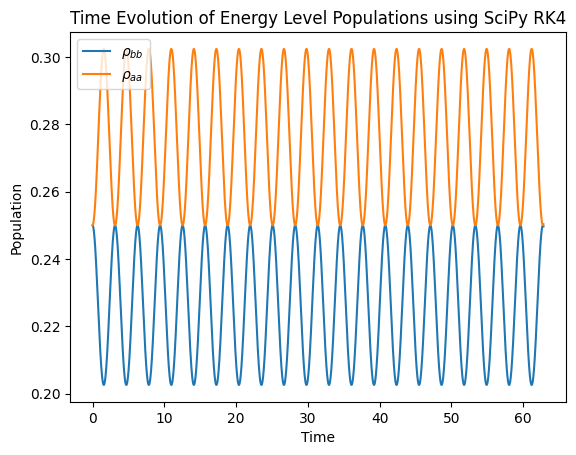

In [11]:
# Plotting solutions for SciPy
plt.plot(t[1:],np.abs(p2[0,1:])**2,label=r'$\rho_{bb}$')
plt.plot(t[1:],np.abs(paa[1:])**2,label=r'$\rho_{aa}$')
plt.title('Time Evolution of Energy Level Populations using SciPy RK4')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc=2)
plt.show()

(0.0, 2.0)

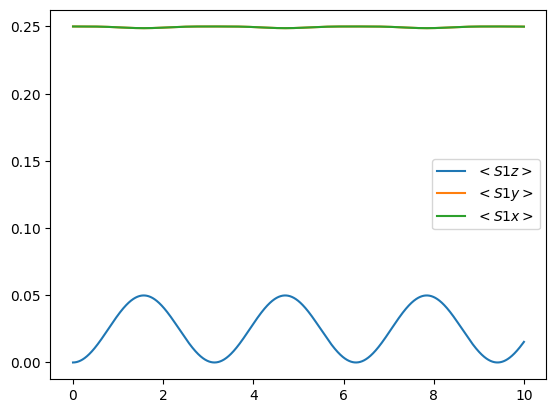

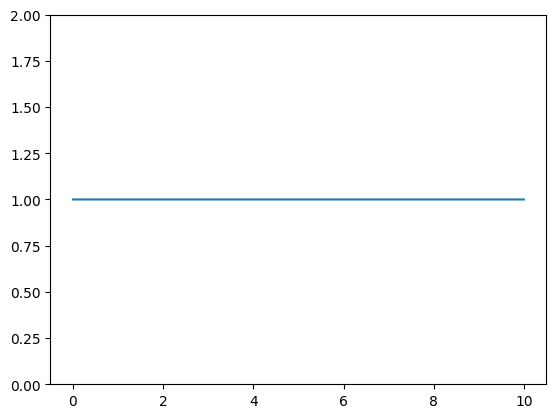

In [18]:
rho=np.zeros([N,2,2],dtype=complex)
rho[:,0,0]=p2[0,:]
rho[:,0,1]=p2[1,:]
rho[:,1,0]=paa
rho[:,1,1]=pba
avg_Sz=np.zeros(N,dtype=complex) # tr(Sz rho)
avg_Sy=np.zeros(N,dtype=complex) # tr(Sz rho)
avg_Sx=np.zeros(N,dtype=complex) # tr(Sz rho)
rhoTrace=np.zeros(N,dtype=complex)

for i in range(N):
    avg_Sz[i]=np.trace( SpinOps(0) @ rho[i,:,:])
    avg_Sy[i]=np.trace( SpinOps(1) @ rho[i,:,:])
    avg_Sx[i]=np.trace( SpinOps(2) @ rho[i,:,:])
    rhoTrace[i]=np.trace(rho[i,:,:])

#Plotting results
plt.figure
plt.plot(t[1:],np.abs(avg_Sz[1:]),label=r'$<S1z>$')
plt.plot(t[1:],np.abs(avg_Sy[1:]),label=r'$<S1y>$')
plt.plot(t[1:],np.abs(avg_Sx[1:]),label=r'$<S1x>$')
plt.legend()

plt.figure()
plt.plot(t[1:],np.abs(rhoTrace[1:]))
plt.ylim([0,2])


## Solving QLE for 2LS system with spontaneous emission

Solving the Quantum Liouville Equation for a two-level system with spontaneous
emission (Lindblad term) using the density matrix formalism. The system of 
equations was reduced to 3 equations and 3 unknowns instead of 4.


In [14]:
N=10000
t=np.linspace(0,10,N)
p=np.zeros([4,N],dtype=complex)
w=1/6;
p[0,0]=1/2 # pbb
p[1,0]=1/2 # pba
p[2,0]=1/2 # pab
p[3,0]=1/2 # paa
W=2 #
d=0.1 # Detuning
# d=0
# gamma=0.1 # Decoherence rate
# gamma=0.01
gamma=0

# Defining functions to integrate in an array to use in SciPy
# First element of F is dpbb/dt, second is dpab/dt, third is dpaa/dt
def dFdt(t,F):
    Vba=-1.0j*(W/2)*np.exp(1.0j*d*t)
    Vab=-1.0j*(W/2)*np.exp(-1.0j*d*t)
    return np.array([Vba*F[2]-Vab*F[1] -gamma*F[0],
                     (1-2*F[0])*Vba-0.5*gamma*F[1],
                     (2*F[0]-1)*Vab-0.5*gamma*F[2]])

# Initial conditions
F0=np.array([p[0,0],p[1,0],p[2,0]]) #  pbb=1/2, pba=1/2, pab=1/2
t0=0 # t=0

In [15]:
# Setting integrand in scipy integrator and calling RK4 method
r=integrate.complex_ode(dFdt).set_integrator('dopri5') 
r.set_initial_value(F0,t0) # Setting initial values
p2=np.zeros((3,N),dtype=complex) # Allocating space for solutions in 2xN matrix
paa=np.zeros((1,N),dtype=complex) 

# Begin coupled SciPy RK4
for i in range(1,t.size):
    p2[:,i]=r.integrate(t[i])
    if not r.successful():
        raise RuntimeError("Could Not Integrate")
        
pba=1-p2[0,:]

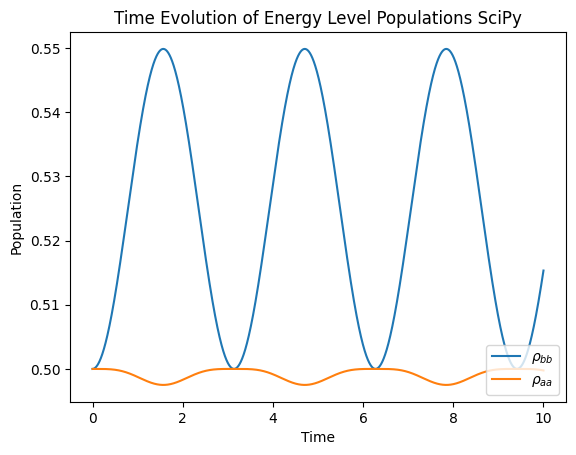

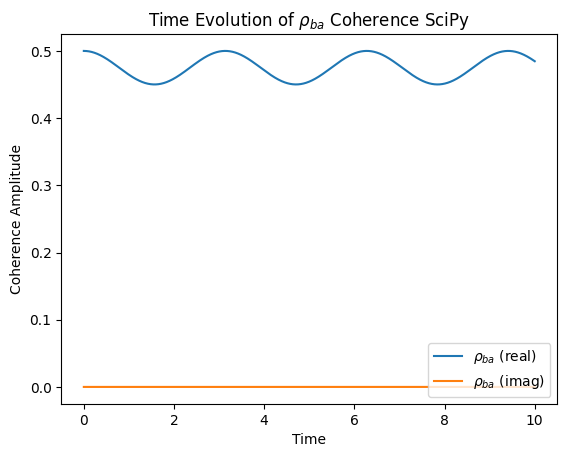

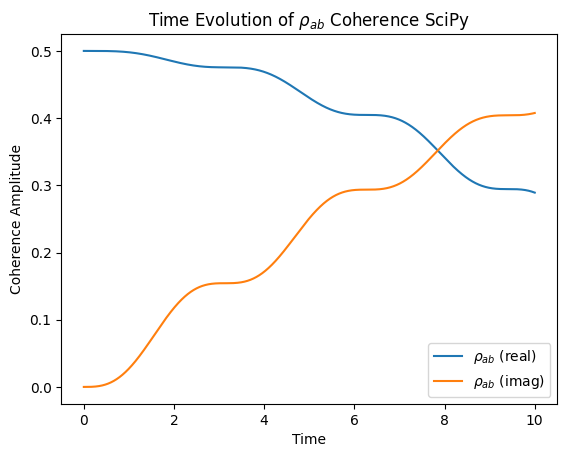

In [16]:
# Plotting solutions for SciPy
# First point omitted due to problems with integration
plt.plot(t[1:],np.abs(p2[0,1:]),label=r'$\rho_{bb}$')
plt.plot(t[1:],np.abs(p2[2,1:]),label=r'$\rho_{aa}$')
plt.title('Time Evolution of Energy Level Populations SciPy')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc=4)
plt.show()

plt.plot(t[1:],np.real(pba[1:]),label=r'$\rho_{ba}$ (real)')
plt.plot(t[1:],np.imag(pba[1:]),label=r'$\rho_{ba}$ (imag)')
plt.title(r'Time Evolution of $\rho_{ba}$ Coherence SciPy')
plt.xlabel('Time')
plt.ylabel('Coherence Amplitude')
plt.legend(loc=4)
plt.show()

plt.plot(t[1:],np.real(p2[1,1:]),label=r'$\rho_{ab}$ (real)')
plt.plot(t[1:],np.imag(p2[1,1:]),label=r'$\rho_{ab}$ (imag)')
plt.title(r'Time Evolution of $\rho_{ab}$ Coherence SciPy')
plt.xlabel('Time')
plt.ylabel('Coherence Amplitude')
plt.legend(loc=4)
plt.show()